In [ ]:
#This step is necessary as it provides access to the google drive where the dataset is stored.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import math
import random
import numpy as np
import pandas as pd
# import seaborn as sns
# import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

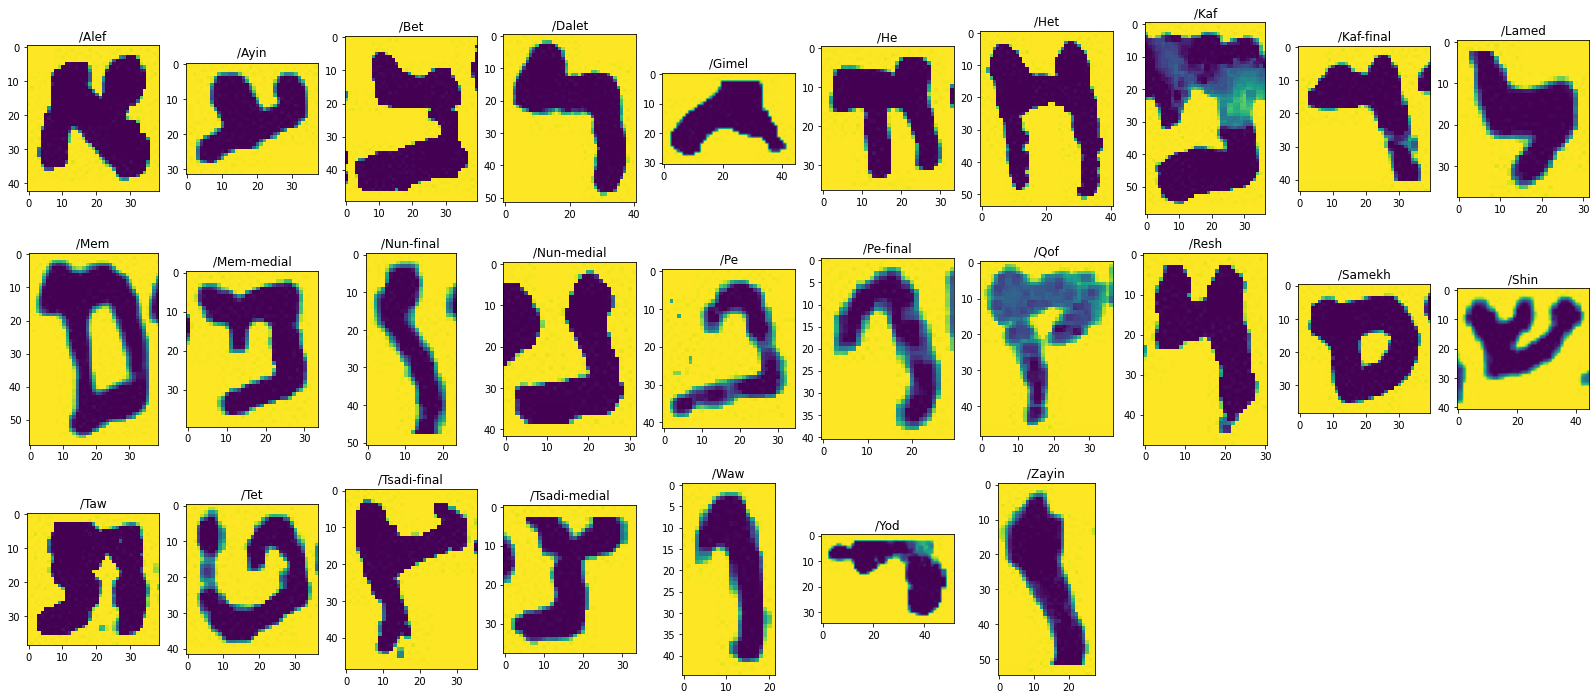

In [ ]:
DATA_DIR = "../../data/dss/"
TRAIN_DATA_DIR = DATA_DIR + "monkbrill/"

img_folder = DATA_DIR + "train-imgs/"  # '/content/gdrive/My Drive/HWR_Data/test-images'
char_folder = TRAIN_DATA_DIR  # '/content/gdrive/My Drive/HWR_Data/chars-jpg'
chars = ['/Alef', '/Ayin', '/Bet', '/Dalet', '/Gimel', '/He', '/Het', '/Kaf', '/Kaf-final', '/Lamed',
         '/Mem', '/Mem-medial', '/Nun-final', '/Nun-medial', '/Pe', '/Pe-final', '/Qof', '/Resh',
         '/Samekh','/Shin', '/Taw', '/Tet', '/Tsadi-final', '/Tsadi-medial', '/Waw', '/Yod', '/Zayin']

plt.figure(figsize=(28,12))

for i in range(27):
    file = random.choice(os.listdir(char_folder + chars[i]))
    image_path = os.path.join(char_folder + chars[i], file)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    ax = plt.subplot(3, 10, i+1)
    ax.title.set_text(chars[i])
    plt.imshow(img)

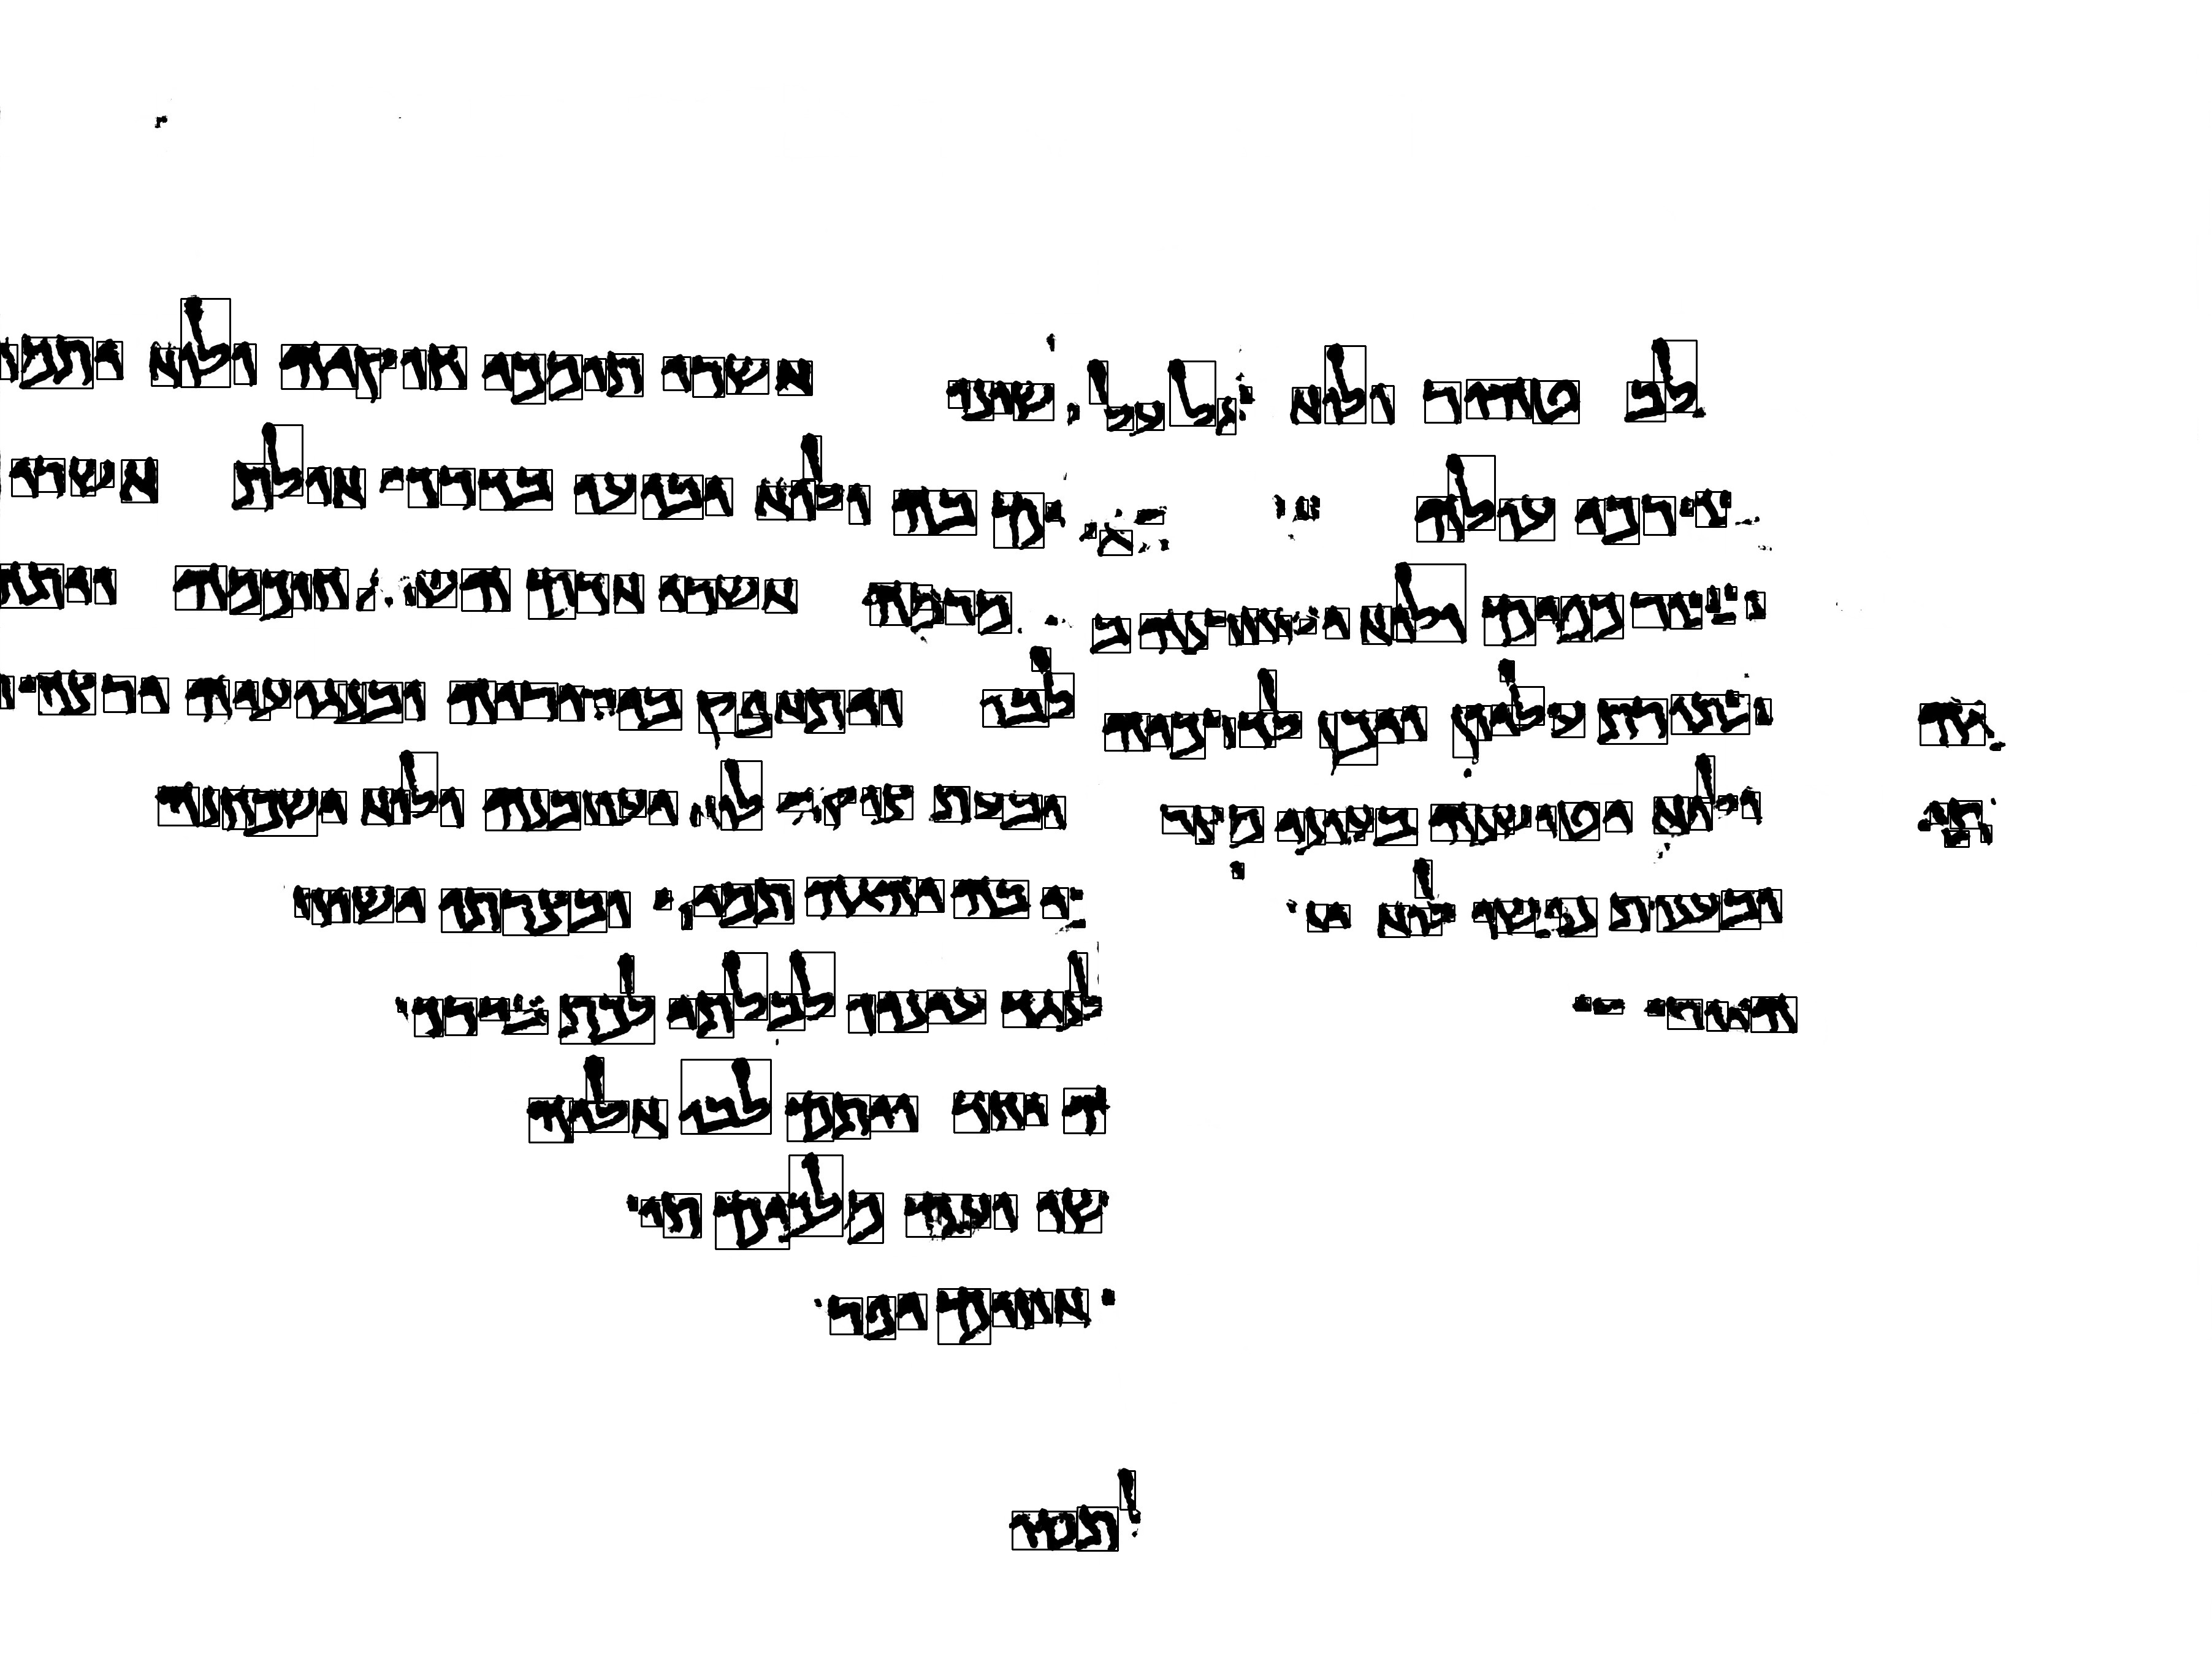

In [ ]:
from google.colab.patches import cv2_imshow
random.seed(8)
file = random.choice(os.listdir(img_folder))
image_path = os.path.join(img_folder, file)
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)                                 
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]    

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(morph, cv2.MORPH_ERODE, kernel)

cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

result = gray.copy()
for c in cntrs:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv2.imwrite("test_text_lines.jpg", result)
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#IAM # https://arxiv.org/pdf/2103.06450.pdf

################## https://www.sciencedirect.com/science/article/pii/S0925231217319112

# https://link.springer.com/article/10.1007/s00521-020-05070-8

# https://www.researchgate.net/profile/Salma-Rosyda-2/publication/350286160_A_Review_of_Various_Handwriting_Recognition_Methods/links/6087c60a881fa114b42e0043/A-Review-of-Various-Handwriting-Recognition-Methods.pdf

# https://www.sciencedirect.com/science/article/pii/S0925231218301371

# https://ieeexplore.ieee.org/abstract/document/8270042

# https://hal.archives-ouvertes.fr/hal-01681126/
